# day 81 and day 82

# boosting

# definition:
* it boosts any machine learning model.
* it is predicated upon the idea that a bunch of machine learning model combined together(boosted) would perform better than any single model on its own. 
* combination process happens with the help of taking all the models' weighted sum. 

# weak model and weak decision tree
* a weak model is a simple model that is too simple to perform well on its own.
* a weak decision tree is a stump, one node and two leaves

# $$ FT(x) = \sum_{t=1}^{T} f_{t}(x) $$

# $$ \downarrow $$

# $$ f_{t}(x) = a_{t} h(x) $$
# $$\text{  where h(x) is any machine learning model} $$

# connecting probability, unexpected, and entropy


# $$ \text{unexpected} = \log_{2} (\frac{1}{\text{probability of success}}) $$

# unexpected of a series of events

# $$ \text{ total unexpected} = \text{ (probability of sucess * number of events * unexpected) } $$

# ENTROPY

# $$ \text{ENTROPY} = \frac{\text{total unexpected}}{\text{total number of events(n)}} $$




* in other entropy is the mean of the unexpected


# $$ \text{ENTROPY} = \sum_{i=1}^{n} p(x_i)\log_{2}\frac{1}{p(x_i)} $$

* when things are similar or equal the entropy is max(1), when things are completely different then entropy is 0.


# predicting the toxicity of a mushroom based on data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# attribute information



cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

bruises?: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# checking the # of poisonous mushroom and edible ones present in the data

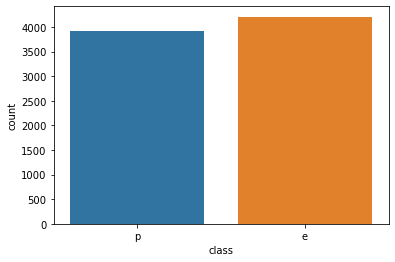

In [5]:
sns.countplot(data=df,x='class')



plt.show()

# sorting the DataFrame based on the #of unique features it has

In [11]:
feat_uni = df.describe().T.reset_index().sort_values('unique')


feat_uni

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


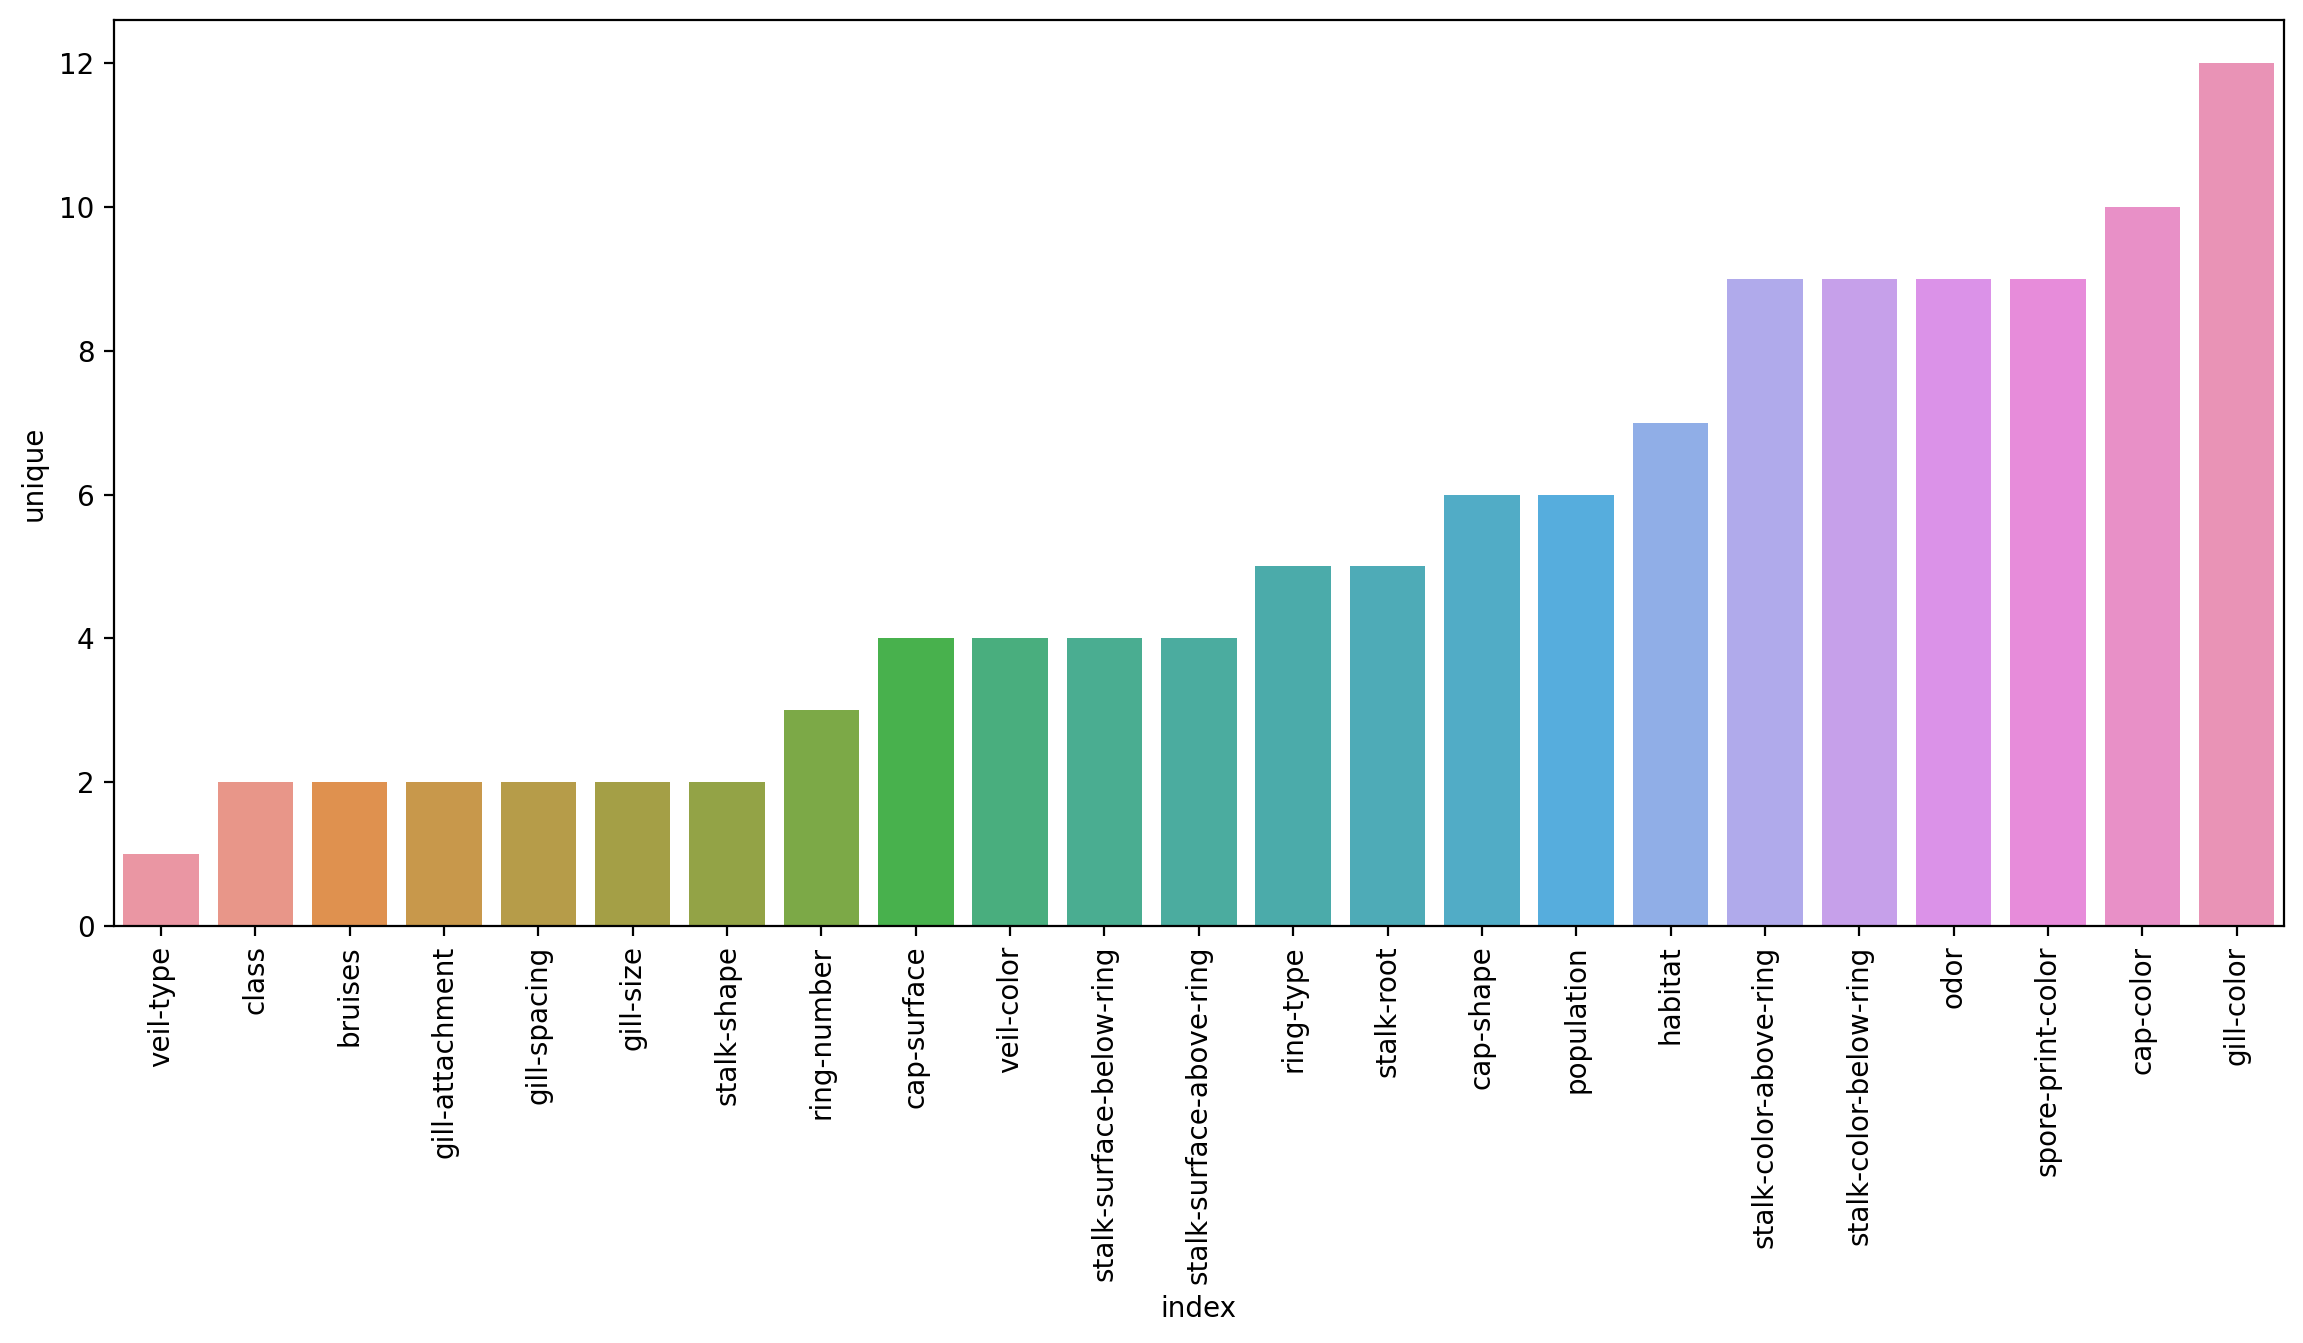

In [15]:
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(data=feat_uni,x='index',y='unique')

plt.xticks(rotation=90)

plt.show()

# model building

In [16]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [79]:
x = df.drop('class',axis=1)
y = df['class']


# getting dummies to convert categorical labels into quantifiable data. 
# check to see if x has no null data before numeric conversion. 

x = pd.get_dummies(x,drop_first=True)

# train_test_splitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=101)

# AdaBoostClassifier : Adaptive Boosting Classifier.

from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(n_estimators=128)

ada.fit(x_train,y_train)

# prediction and error metrics\

from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

actual = y_test
prediction = ada.predict(x_test)




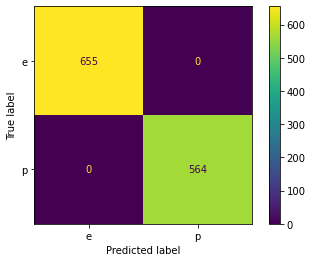

In [35]:
ConfusionMatrixDisplay.from_estimator(ada,x_test,y_test)

In [36]:
accuracy_score(actual,prediction)

1.0

In [37]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



# seeing which feature in the x columns is the most important of all

In [38]:
x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [55]:
x.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [59]:
x.columns[ada.feature_importances_.argmax()]

'spore-print-color_w'

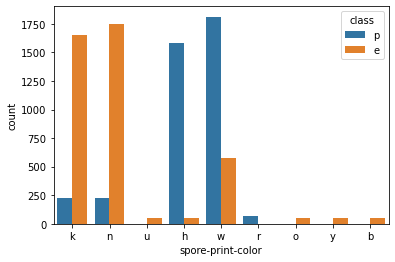

In [60]:
sns.countplot(data=df,x='spore-print-color',hue='class')
plt.show()

# elbow method to calculate error with each addition of estimators

In [27]:
errors = []

for i in range(1,129):
    ada = AdaBoostClassifier(n_estimators=i)
    
    ada.fit(x_train,y_train)
    actual = y_test
    prediction = ada.predict(x_test)
    
    error = 1 - accuracy_score(actual,prediction)
    
    errors.append(error)
    
    


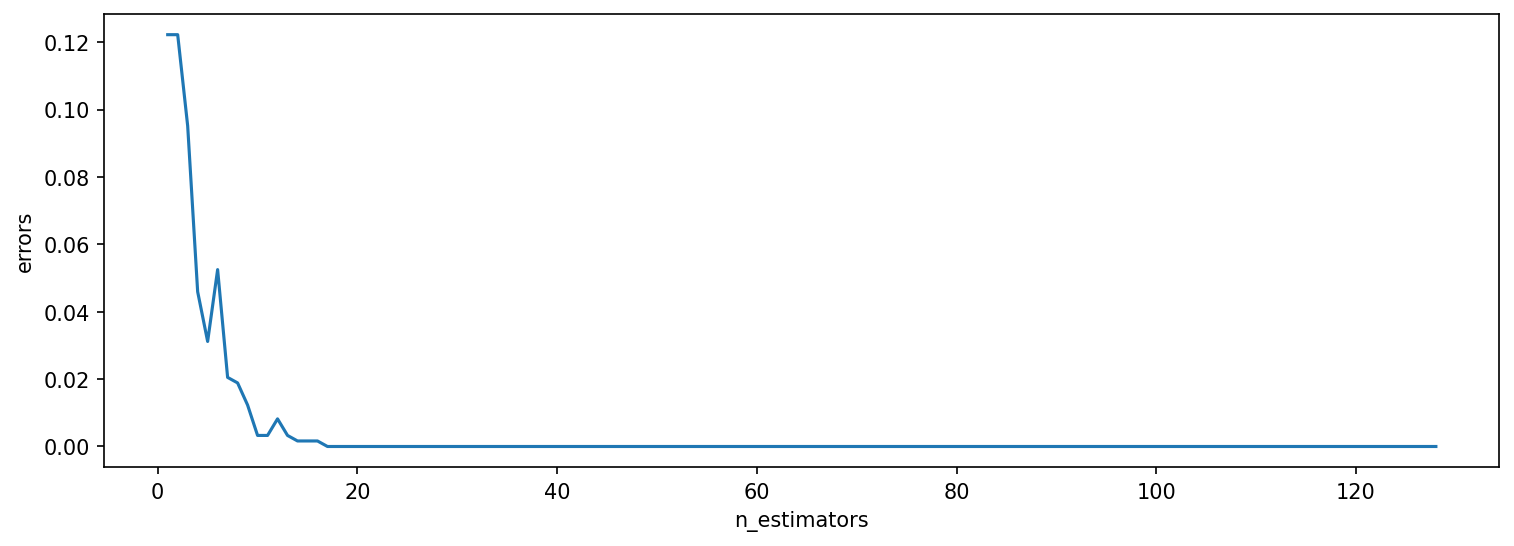

In [30]:
x = np.arange(1,129,1)

y = errors

plt.figure(figsize=(12,4),dpi=150)
plt.plot(x,y)

plt.xlabel('n_estimators')
plt.ylabel('errors')
plt.show()

# seeing all the significant features

In [62]:
ada.feature_importances_

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.0078125, 0.       , 0.       , 0.0078125,
       0.       , 0.       , 0.       , 0.0078125, 0.       , 0.0859375,
       0.03125  , 0.03125  , 0.       , 0.       , 0.0546875, 0.015625 ,
       0.       , 0.       , 0.       , 0.1171875, 0.078125 , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.0078125, 0.0078125,
       0.       , 0.       , 0.0078125, 0.0546875, 0.       , 0.       ,
       0.       , 0.       , 0.03125  , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.0703125, 0.       , 0.       , 0.0078125,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.015625 ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.0390625, 0.       , 

In [80]:
features = pd.DataFrame(data=ada.feature_importances_,index=x.columns,columns=['features'])

features

,features
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [81]:
features[features['features']>0]

,features
cap-color_c,0.007812
cap-color_n,0.007812
cap-color_w,0.007812
bruises_t,0.085938
odor_c,0.031250
odor_f,0.031250
odor_n,0.054688
odor_p,0.015625
gill-spacing_w,0.117188
gill-size_n,0.078125


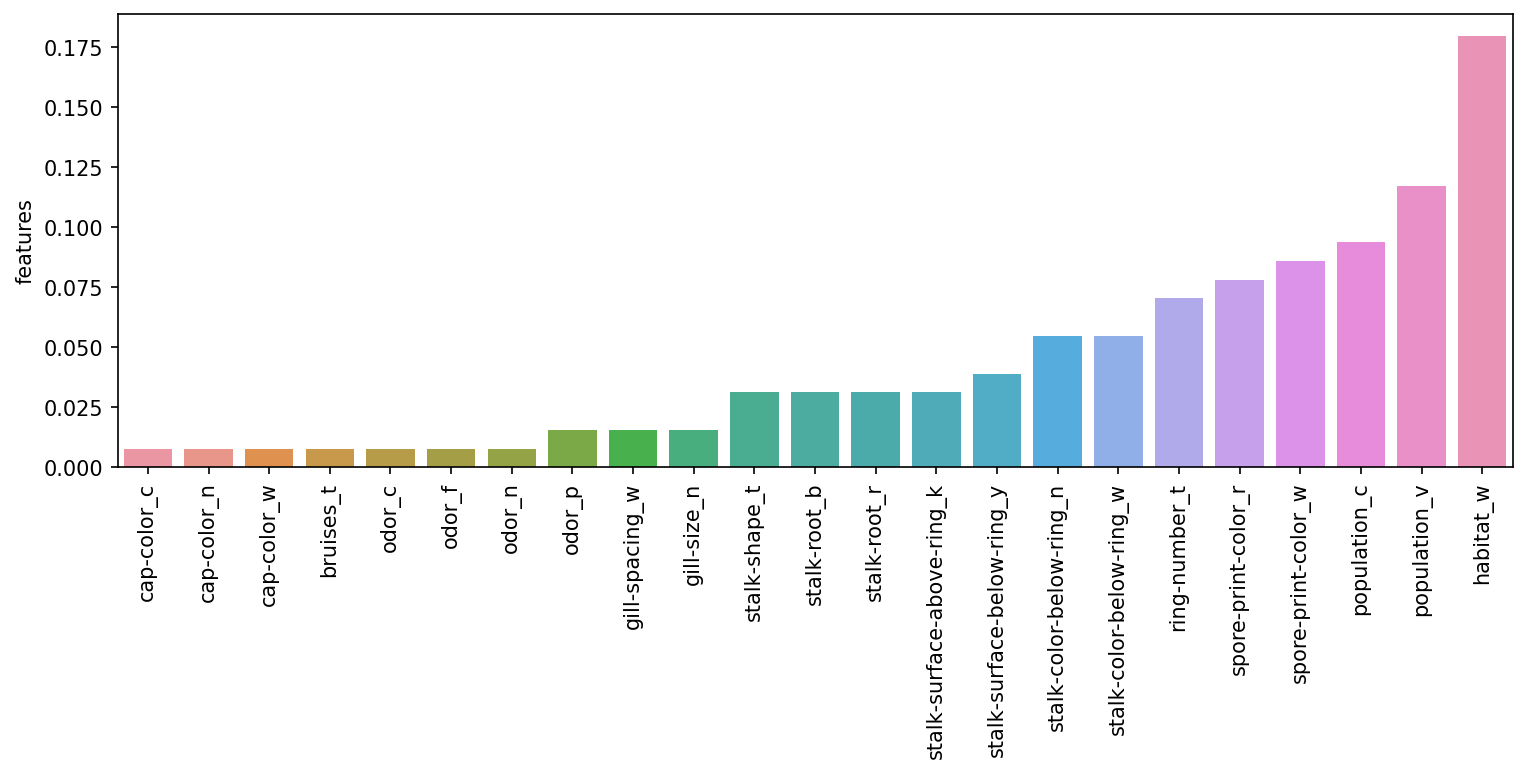

In [82]:
important_features = features[features['features']>0]

plt.figure(figsize=(12,4),dpi=150)


sns.barplot(data=important_features.sort_values('features'),x=important_features.index,y='features')


plt.xticks(rotation=90)


plt.show()

# Gradient Boosting vs ADA Boost

Larger Trees allowed in Gradient Boosting.

Learning coefficient is same for all weak learners.

Gradual series learning is based on training on the residuals of the previous data. 


Note: Residuals is = Actual - prediction.

Gradient Boosting is an error reduction strategy wherein at each iteration based off of the previous error we are creating the prediction model not only for the y values but also for the errors(y-yhat) and subtract the y-hat from the (y-yhat). 


# $$ \hat{y}_{m} = \hat{y}_{m-1} + (\text{learning rate } * \hat{y}_{m}) $$

# day 83

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# model building


In [6]:
x = df.drop('class',axis=1)
y = df['class']

x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [7]:
# converting the categorical values into numerical values
x = pd.get_dummies(x,drop_first=True)
x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50,100,128,200],'learning_rate':[0.1,0.2,0.05],'max_depth':[1,2,3,4,5],
              'max_features':['auto','log2']}

grid = GridSearchCV(gb_model,param_grid)

grid.fit(x_train,y_train)

# actual and prediction

actual = y_test
prediction = grid.predict(x_test)

help(GradientBoostingClassifier)


# n_estimators 

* n_estimators is # of trees in the forest
* max_depth is how deep each tree is
* there is trade off between n_estimators and learning_rate as learning_rate shrinks the contribution of each decision tree by the specified value. default is 0.1. 

* max_features is # of number of conditions or features of x that each tree would be based off. 

In [13]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [19]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 128}

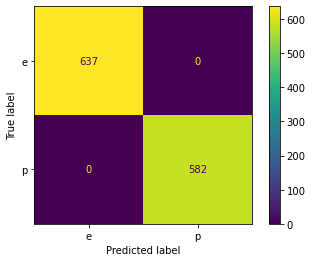

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report


ConfusionMatrixDisplay.from_estimator(grid,x_test,y_test)

In [20]:
accuracy_score(actual,prediction)

1.0

In [22]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



# taking the important features out

In [24]:
features_importances = grid.best_estimator_.feature_importances_
features_importances

array([1.49842451e-04, 0.00000000e+00, 8.16246751e-17, 0.00000000e+00,
       0.00000000e+00, 1.13057657e-03, 4.49046322e-16, 1.45616854e-05,
       1.15683095e-05, 0.00000000e+00, 0.00000000e+00, 1.58532087e-05,
       7.35852668e-18, 0.00000000e+00, 0.00000000e+00, 1.38480473e-05,
       2.39379014e-03, 5.49778737e-02, 1.76129182e-04, 2.18292285e-02,
       2.19337190e-02, 2.11645255e-03, 6.13647260e-01, 5.77863804e-03,
       0.00000000e+00, 0.00000000e+00, 2.33018571e-18, 1.01658762e-02,
       8.48833018e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.11291762e-17, 0.00000000e+00, 1.30089937e-16,
       1.94314758e-16, 0.00000000e+00, 3.62050249e-18, 2.80002268e-18,
       2.35831743e-06, 2.54591128e-04, 1.31770194e-01, 2.99898661e-03,
       2.34523645e-02, 7.09580331e-04, 3.76682251e-06, 1.41790195e-05,
       1.80641212e-05, 0.00000000e+00, 4.35185270e-02, 1.24110485e-04,
       0.00000000e+00, 0.00000000e+00, 5.88382196e-04, 0.00000000e+00,
      

In [27]:
important = pd.DataFrame(data=features_importances,index=x.columns,columns=['Important Features'])
important

,Important Features
cap-shape_c,1.498425e-04
cap-shape_f,0.000000e+00
cap-shape_k,8.162468e-17
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,7.866359e-18
habitat_p,0.000000e+00
habitat_u,5.415796e-05


In [35]:
important = important[important['Important Features'] > 0.0001]

important

,Important Features
cap-shape_c,0.000150
cap-surface_g,0.001131
cap-color_y,0.002394
bruises_t,0.054978
odor_c,0.000176
odor_f,0.021829
odor_l,0.021934
odor_m,0.002116
odor_n,0.613647
odor_p,0.005779


In [40]:
important = important.sort_values('Important Features',ascending=False)
important

,Important Features
odor_n,0.613647
stalk-root_c,0.131770
bruises_t,0.054978
stalk-surface-below-ring_y,0.043519
spore-print-color_r,0.034408
stalk-root_r,0.023452
odor_l,0.021934
odor_f,0.021829
gill-spacing_w,0.010166
gill-size_n,0.008488


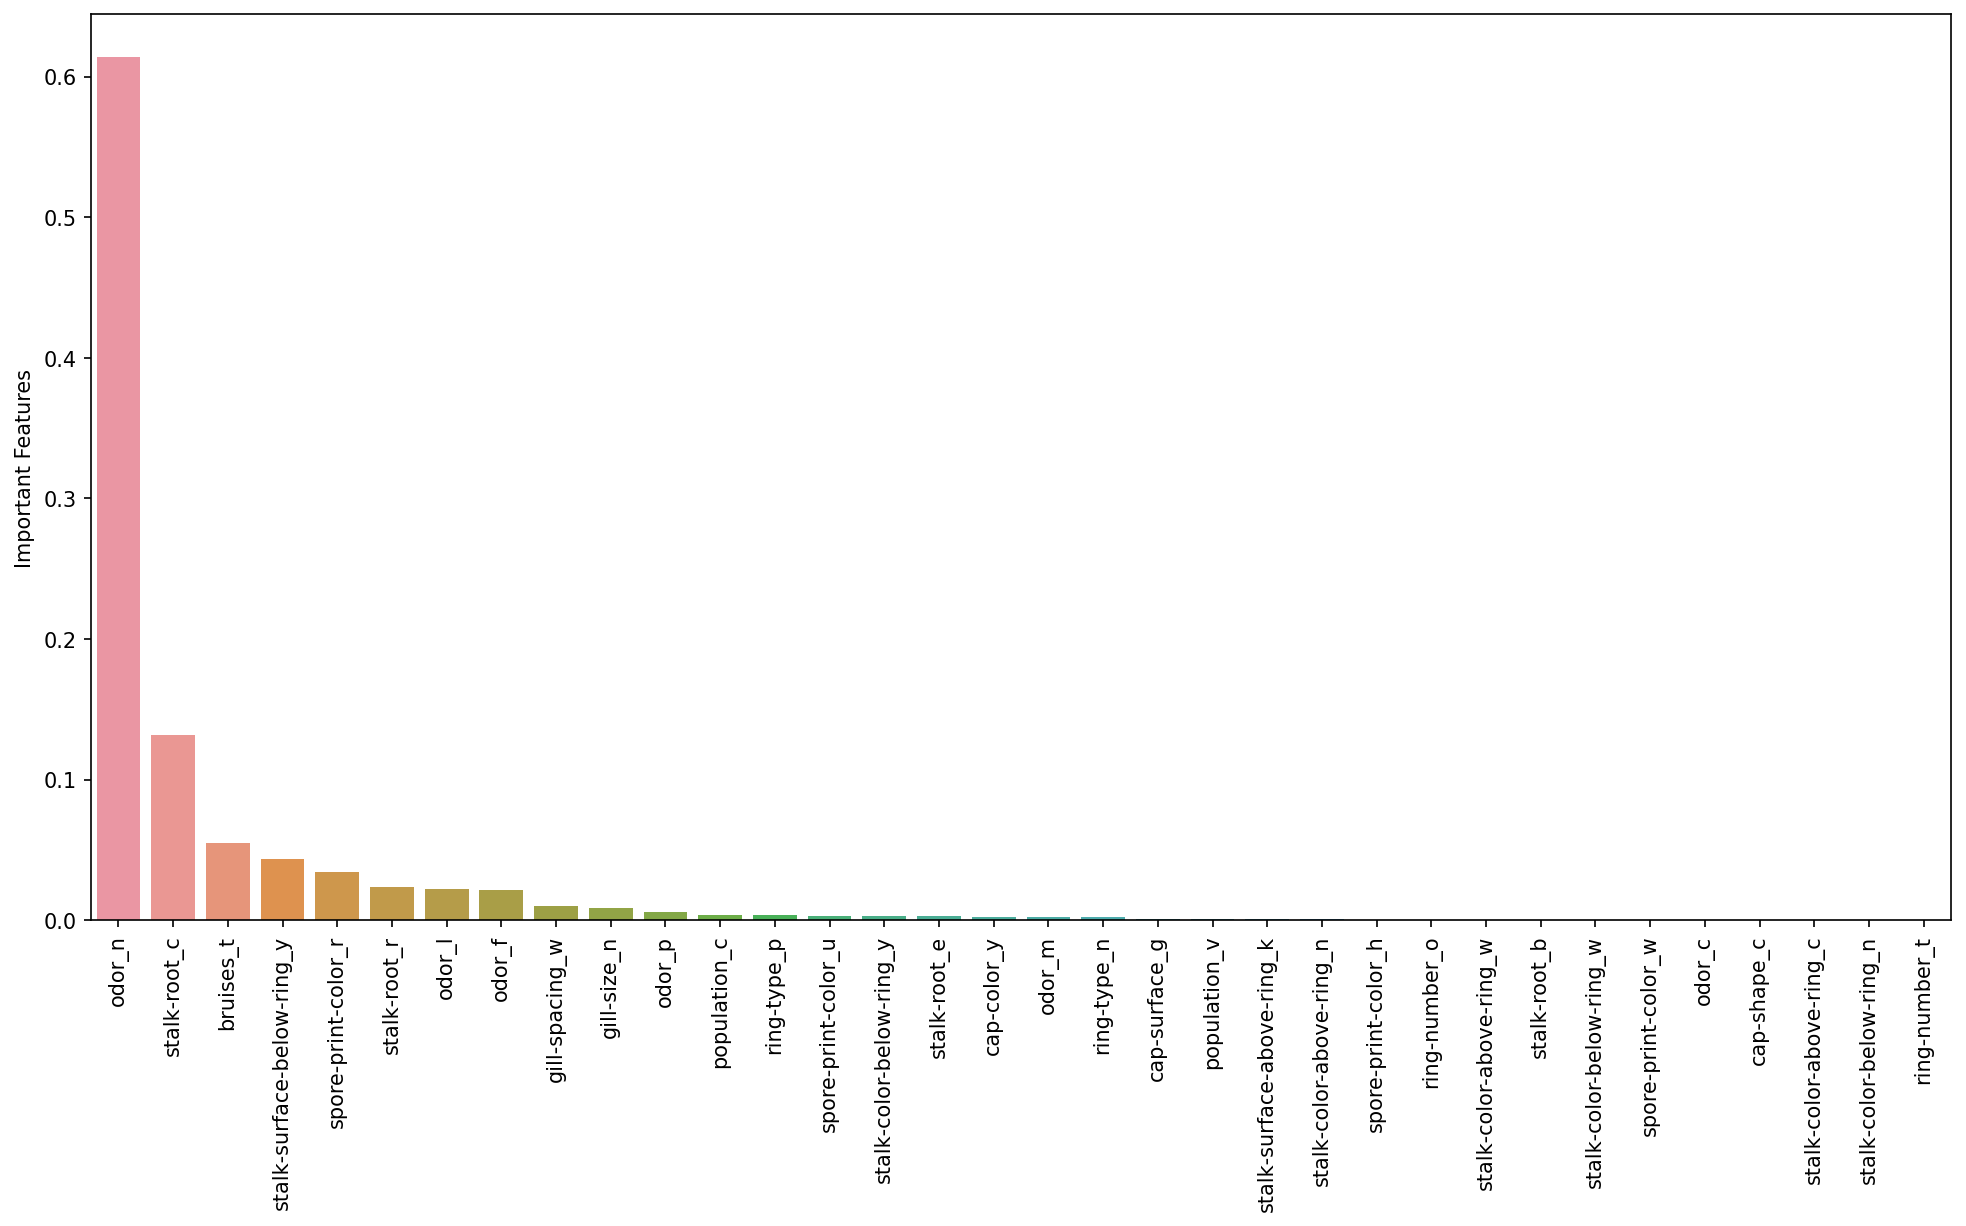

In [43]:

plt.figure(figsize=(16,8),dpi=150)
sns.barplot(data=important,x=important.index,y='Important Features')


plt.xticks(rotation=90)
plt.show()